# ESS 330 Final Project

Yazeed Aljohani (Colorado State University)  
Josh Puyear (Colorado State University)  
Cade Vanek (Colorado State University)

# Introduction, Background, and Motivation

The COVID-19 pandemic drastically changed the way people lived, worked, and moved, especially during the early lockdown period in 2020. Globally, one of the most significant consequences of these behavioral shifts was a sharp and sudden drop in greenhouse gas (GHG) emissions, particularly carbon dioxide (CO₂) emissions from fossil fuels. According to Liu et al. (2020), global fossil CO₂ emissions declined by approximately 7.8% in the early months of the pandemic (@liu2020covid). This decrease was driven largely by transportation sectors, as road transport emissions dropped by about 15.5% and aviation emissions declined by nearly 29%. These reductions were felt across continents, including in China, Europe, and the United States (@forster2020current).

Transportation is the largest source of greenhouse gas emissions in the United States, accounting for nearly 29% of total emissions (@epa2022). Within urban environments, where population density and economic activity are centered, the contribution of transportation to local carbon footprints is often even greater. As cities tussle with climate change and look for strategies to lower emissions, understanding how transportation emissions responded to reduced human activity during COVID-19 becomes an important starting point. Did cities with more public transportation infrastructure see greater drops in emissions? Were some cities more resilient to emissions rebounds in 2021–2022? These are the kinds of questions our project aims to explore.

This project focuses on analyzing transportation-related carbon emissions in five major U.S. counties (Los Angeles County, Cook County, Harris County, San Francisco County, and King County) from 2019 through 2022. These counties were selected based on their large populations, diverse transportation infrastructure, and the availability of emissions and mobility data. By comparing emissions across three key periods: pre-pandemic (2019), pandemic lockdown (2020), and post-lockdown recovery (2021–2022). We aim to better understand how transportation behavior affects regional emissions and how these patterns can inform future urban planning and climate policies.

Our objective is to quantify and compare changes in transportation-related CO₂ emissions in these five counties before, during, and after the COVID-19 lockdowns. We hypothesize that counties with stricter lockdowns and greater reliance on public transit, such as San Francisco County and King County, will show more substantial emissions reductions in 2020 and possibly more gradual rebounds in the following years. In contrast, counties with more car-dependent infrastructure, such as Harris County and Los Angeles County, may show smaller reductions and quicker rebounds. By analyzing how emissions changed in relation to mobility patterns, we hope to uncover how regional urban form, transportation infrastructure, and human behavior interact during times of major disruption.

To address this research question, we are using two primary datasets. First, we use the EPA’s National Emissions Inventory (NEI), which provides comprehensive emissions estimates, including on-road transportation sources. The NEI is compiled every three years, with the most recent versions available for 2017 and 2020. While annual data is not always available, these datasets still provide valuable estimates for major emissions sectors at the county level, which aligns directly with our selected regions. For our analysis, we are focusing on transportation-related CO₂ emissions specifically in Los Angeles County, Cook County, Harris County, San Francisco County, and King County.

Our methodology involves three main components. First, we will **visualize** emissions and mobility trends over time using R and `ggplot2`. This will help identify patterns, anomalies, or significant changes during the lockdown period and beyond. Second, we will use a one-way ANOVA to statistically test whether mean CO₂ emissions differ significantly between the three periods (2019, 2020, and 2022). This will allow us to test our hypothesis that emissions were significantly lower during the lockdown year.

Finally, we will explore correlations between mobility and emissions to determine whether reductions in transit and workplace movement are associated with emission changes. While we acknowledge the limitations of this approach, such as mismatched temporal resolution and varying data accuracy, it still offers a strong starting point for evaluating behavior-emissions relationships. If time permits, we may consider adding additional contextual variables, such as county population density, public transportation usage rates, or local lockdown policies, to refine our analysis.

This project is important for several reasons. First, it provides insight into how short-term behavioral changes impact transportation emissions, a sector that is difficult to decarbonize. Second, it allows us to evaluate which counties were most successful in reducing emissions and why, knowledge that can inform future policies aimed at promoting sustainable, low-carbon transportation. Third, it contributes to a growing body of research on the environmental consequences of the COVID-19 pandemic and the lessons we can learn for future resilience planning.

In conclusion, by combining emissions data from the EPA’s NEI with behavioral data from Google’s mobility reports, this project explores how five major U.S. counties responded environmentally to the pandemic. Our analysis will quantify emission changes, investigate behavioral correlations, and highlight opportunities for sustainable urban development in a post-pandemic world.

# Data Exploration

#

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Linking to GEOS 3.13.0, GDAL 3.10.1, PROJ 9.5.1; sf_use_s2() is TRUE

To enable caching of data, set `options(tigris_use_cache = TRUE)`
in your R script or .Rprofile.

The first dataset is an EPA summary of various pollutants organized geographically. For our purposes, we will be only analyzing the CO2 measurements. The second set is google mobility data taken during the COVID-19 pandemic, measuring how different counties increased or decreased transportation frequency and usage.

cleaning:

In [ ]:
co2_data <- read_csv("data/co2_emissions.csv") %>%
  mutate(
    FIPS = str_pad(FIPS, 5, pad = "0"),
    Emissions_Tons = `Emissions (Tons)`
  )

Rows: 253757 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): State, State-County, Pollutant, Pollutant Type, EIS Sector, Source...
dbl  (2): SCC Code, EPA Region
num  (1): Emissions (Tons)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 747969 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): country_region_code, country_region, sub_region_1, sub_region_2, is...
dbl (6): retail_and_recreation_percent_change_from_baseline, grocery_and_pha...
lgl (1): metro_area

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

#

In [ ]:
joined_data <- co2_data %>%
  inner_join(mobility_data, by = "FIPS")

us_counties <- counties(cb = TRUE, class = "sf") %>%
  mutate(FIPS = paste0(STATEFP, COUNTYFP))

Retrieving data for the year 2022

Plotting the data:

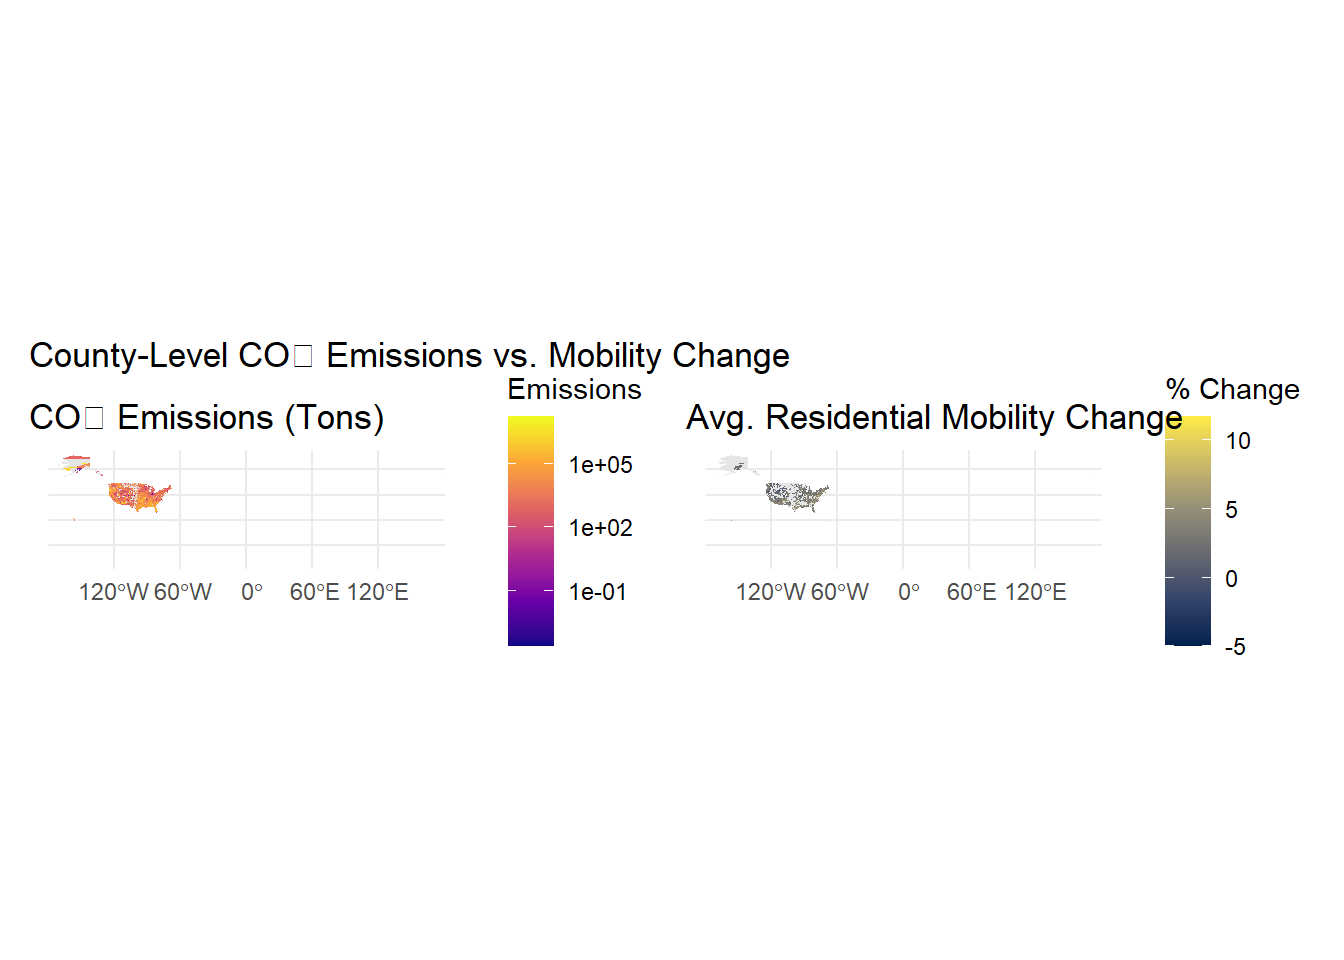

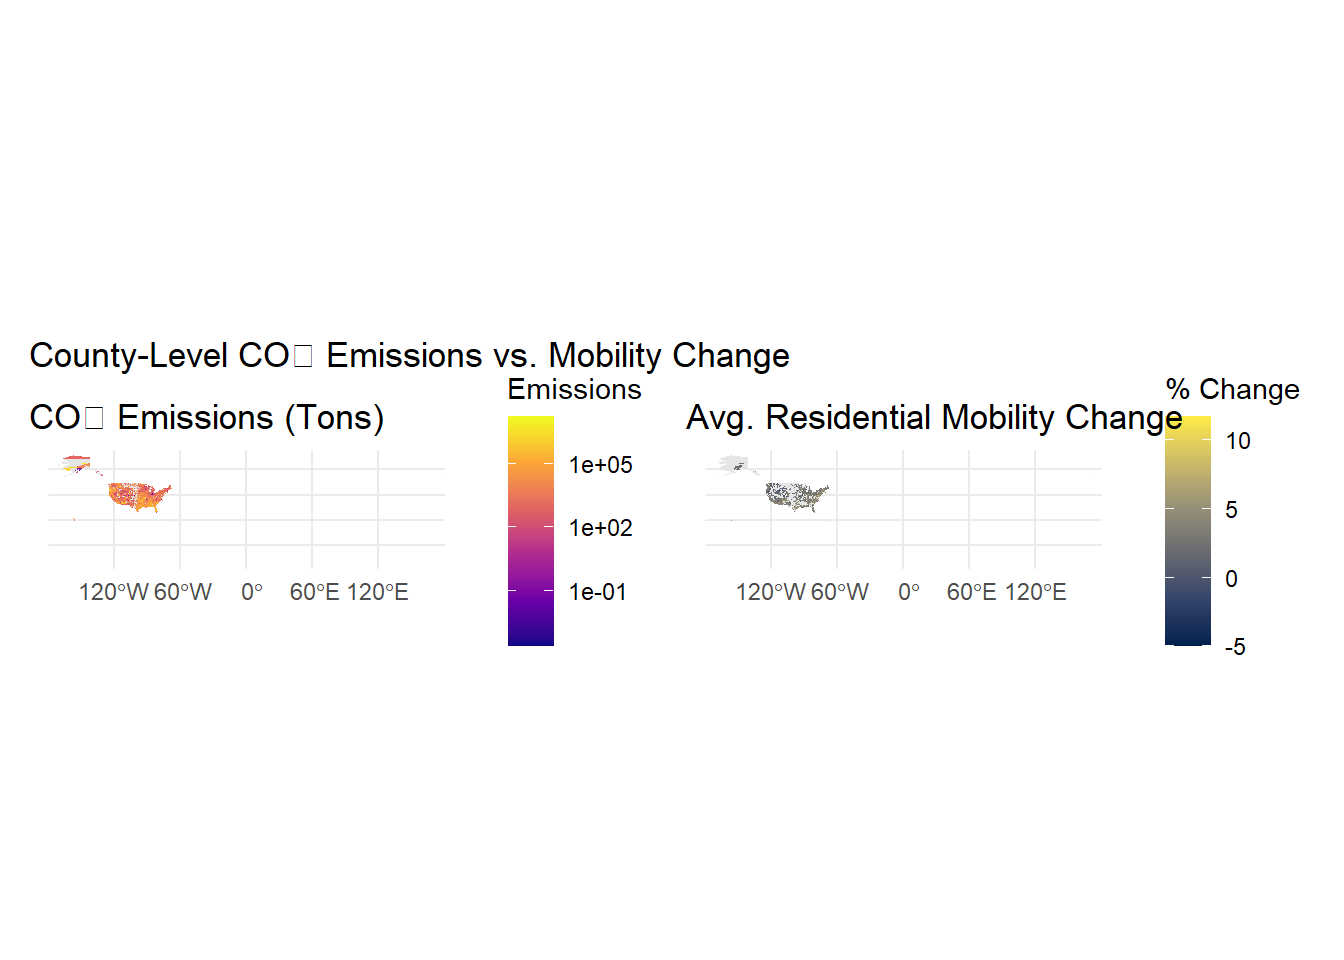

In [ ]:
map_co2 <- ggplot(map_data) +
  geom_sf(aes(fill = Emissions_Tons), color = NA) +
  scale_fill_viridis_c(option = "plasma", trans = "log10", na.value = "grey90") +
  labs(title = "CO₂ Emissions (Tons)", fill = "Emissions") +
  theme_minimal()

map_mobility <- ggplot(map_data) +
  geom_sf(aes(fill = avg_residential), color = NA) +
  scale_fill_viridis_c(option = "cividis", na.value = "grey90") +
  labs(title = "Avg. Residential Mobility Change", fill = "% Change") +
  theme_minimal()

map_co2 + map_mobility +
  plot_layout(ncol = 2) +
  plot_annotation(title = "County-Level CO₂ Emissions vs. Mobility Change")

t test:

This suggests that CO2 levels and mobility are highly interrelated.

In [ ]:
joined_data <- joined_data %>%
  mutate(emissions_group = if_else(Emissions_Tons > median(Emissions_Tons, na.rm = TRUE), "High", "Low"))


t_test_result <- t.test(avg_residential ~ emissions_group, data = joined_data)

t_test_result


    Welch Two Sample t-test

data:  avg_residential by emissions_group
t = 25.878, df = 145263, p-value < 2.2e-16
alternative hypothesis: true difference in means between group High and group Low is not equal to 0
95 percent confidence interval:
 0.1896032 0.2206779
sample estimates:
mean in group High  mean in group Low 
          3.794758           3.589617 

lin reg:

this test further supports the idea that CO2 emissions were a significant predictor of mobility during 2020.

In [ ]:
model <- lm(avg_residential ~ Emissions_Tons, data = joined_data)

summary(model)


Call:
lm(formula = avg_residential ~ Emissions_Tons, data = joined_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7275 -0.9202 -0.0446  0.8681  8.0388 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.697e+00  3.965e-03  932.61   <2e-16 ***
Emissions_Tons 4.566e-07  2.907e-08   15.71   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.539 on 152188 degrees of freedom
  (74636 observations deleted due to missingness)
Multiple R-squared:  0.001619,  Adjusted R-squared:  0.001612 
F-statistic: 246.7 on 1 and 152188 DF,  p-value: < 2.2e-16

# Methods Identified

Will be added soon